# Linear Regression

In [5]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=0)

## Loss Functions

In [2]:
def MSE(predicted,real):
    return np.mean(0.5*(predicted-real)**2)

test_mse_pred = np.ones(5)+2
test_mse_real = np.ones(5)
test_mse_error = MSE(test_mse_pred,test_mse_real)
print('MSE is %f, should be 2'%(test_mse_error))

MSE is 2.000000, should be 2


## Synthetic Data

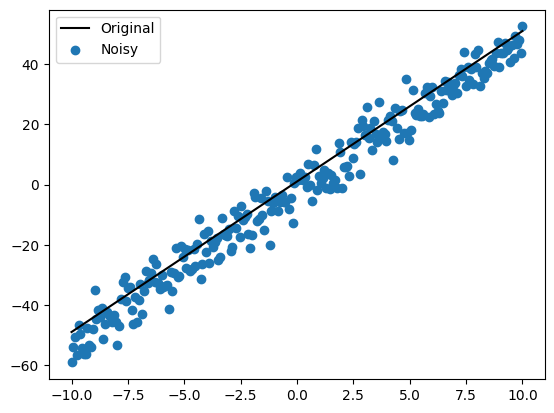

In [37]:
def linear_model(x,m=5,b=1):
    return m*x + b
x = np.linspace(-10,10,num=256)
y_line = linear_model(x)

scale = 5
noise = scale*rng.standard_normal(len(x))-(scale/2)
y_noisy = noise+y_line

plt.figure()
plt.plot(x,y_line, color='black', label='Original')
plt.scatter(x,y_noisy, color='C0', label='Noisy')
plt.legend()

## Analytic Solution

m = 5.011732, b = -1.827436
MSE: 11.380257


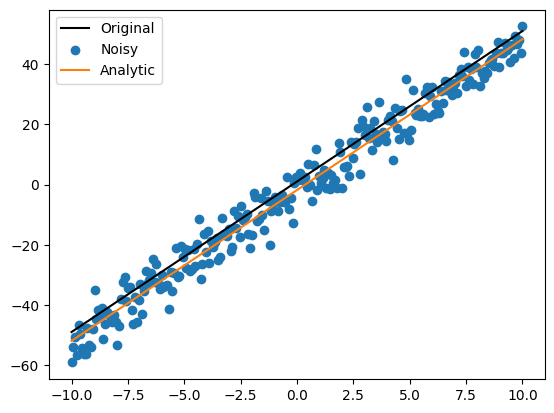

In [38]:
X = np.hstack((x[np.newaxis].T,np.ones([len(x),1])))
w_star = np.linalg.inv(X.T@X)@X.T@y_noisy
print('m = %f, b = %f'%(w_star[0],w_star[1]))
y_predicted = linear_model(x,m=w_star[0],b=w_star[1])
error = MSE(y_predicted, y_noisy)
print('MSE: %f'%error)

plt.figure()
plt.plot(x,y_line, color='black', label='Original')
plt.scatter(x,y_noisy, color='C0', label='Noisy')
plt.plot(x,y_predicted, color='C1', label='Analytic')
plt.legend()

## Stochastic Gradient Descent

In [43]:
def SGD(x, y_real, minibatch_size=32, learning_rate=0.001, num_iter=1000):
    m = rng.random()
    b = rng.random()

    for i in range(num_iter):
        minibatch = rng.choice(minibatch_size, replace=False)
        m -= learning_rate*np.mean(x[minibatch]*(m*x[minibatch] + b - y_real[minibatch]))
        b -= learning_rate*np.mean(m*x[minibatch] + b - y_real[minibatch])
    return m,b

In [44]:
m_pred, b_pred = SGD(x, y_noisy)
print('m: %f, b: %f'%(m_pred, b_pred))

m: 5.428710, b: 0.633745


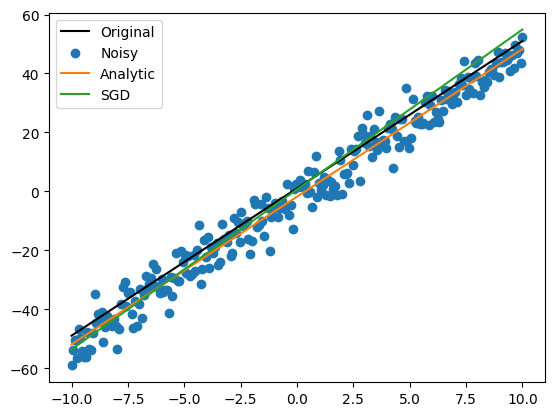

In [45]:
plt.figure()
plt.plot(x,y_line, color='black', label='Original')
plt.scatter(x,y_noisy, color='C0', label='Noisy')
plt.plot(x,y_predicted, color='C1', label='Analytic')
plt.plot(x,linear_model(x,m=m_pred, b=b_pred), color='C2', label='SGD')
plt.legend()